# 딥러닝 맛보기 실습

## 폐암 수술 환자의 생존율 예측 

### 폐암 수술 환자의 생존율 예측 데이타셋 살펴보기
- 폐암 환자 수술 기록 데이터
- 총 470개 관측치, 17개 속성으로 구성
- 설명변수(X) – 16개, 종속변수(클래스, 레이블, Y) – 1개(1:생존, 0:사망)

<img src="./img/폐암환자데이타.jpg" align=left width=600>

### 1. 실행 환경 준비

In [19]:
# 경고 무시
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
# 모듈 불러오기
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense       
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)

### 2. 데이터 준비

### 1) 데이타 불러오기

In [21]:
import pandas as pd
df = pd.read_csv("./data/ThoraricSurgery3.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


### 2) 설명변수와 종속변수 나누기

In [22]:
X = df.iloc[:, 0:16]  # 설명변수(X) - 환자의 진찰 기록을 X로 지정
y = df.iloc[:, 16]    # 종속변수(y) - 수술후 생존: 1, 수술 후 사망: 0

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79


In [6]:
y 

0      0
1      0
2      0
3      0
4      1
      ..
465    0
466    0
467    0
468    0
469    0
Name: 16, Length: 470, dtype: int64

### 3) 데이타 시각화 

In [23]:
# 컬럼 이름 변경
df.rename(columns = {16:'label'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [24]:
df['label'].value_counts()

0    400
1     70
Name: label, dtype: int64

<Axes: >

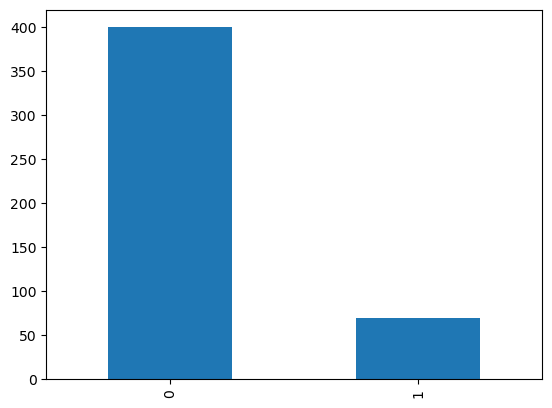

In [25]:
df['label'].value_counts().plot(kind='bar')

### 3. 딥러닝 모델 정의
- 1) 입력층 : 입력변수가 16개, input_dim = 16 또는 input_shape = (16, )로 설정
- 2) 은닉층 : 30개의 노드, 활성화 함수는 relu로 설정
- 3) 출력층 
    - 출력 값이 1개, Dense의 노드 수를 1으로 설정
    - 출력층의 활성화 함수 : 이항 분류이므로 활성화함수를 sigmoid로 사용

In [26]:
model = Sequential()  # 딥러닝 모델의 구조 생성
model.add(Dense(30, input_dim = 16, activation='relu'))   # 입력층(16개의 입력) + 은닉층(30개 노드)
model.add(Dense(1, activation='sigmoid')) # 출력층(1개 출력) 

In [11]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일 설정
- (1) loss 함수 : 이항 분류의 오차 함수인 binary_crossentropy 사용
- (2) 옵티마이저(최적화 함수) : adam 
- (3) 평가 지표 : 정확도(acuuracy)

In [27]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

### 5. 모델 훈련
- (1) epoch : 전체 샘플이 50회 반복 
- (2) batch_size : 한 번에 입력되는 값은 16개
- (3) 반복 횟수 : 470개 관측치 / 16개 배치 사이즈 = 29.375 = 30번, 각 에포크마다 30번 반복
- (4) 가중치 업데이트 총 횟수 : 에포크수 50회 * 각 에포크마다 30번 반복 = 1500번 업데이트

In [28]:
history = model.fit(X, y, epochs=50, batch_size=16)

Epoch 1/50
30/30 [==============================] - 0s 428us/step - loss: 9.5739 - accuracy: 0.1745
Epoch 2/50
30/30 [==============================] - 0s 428us/step - loss: 3.0532 - accuracy: 0.2106
Epoch 3/50
30/30 [==============================] - 0s 415us/step - loss: 0.5105 - accuracy: 0.8213
Epoch 4/50
30/30 [==============================] - 0s 420us/step - loss: 0.4845 - accuracy: 0.8511
Epoch 5/50
30/30 [==============================] - 0s 395us/step - loss: 0.4741 - accuracy: 0.8511
Epoch 6/50
30/30 [==============================] - 0s 422us/step - loss: 0.4699 - accuracy: 0.8511
Epoch 7/50
30/30 [==============================] - 0s 402us/step - loss: 0.4680 - accuracy: 0.8511
Epoch 8/50
30/30 [==============================] - 0s 565us/step - loss: 0.4644 - accuracy: 0.8511
Epoch 9/50
30/30 [==============================] - 0s 585us/step - loss: 0.4618 - accuracy: 0.8511
Epoch 10/50
30/30 [==============================] - 0s 495us/step - loss: 0.4592 - accuracy: 0.8511

### 5. 모델 평가

In [29]:
print("\n Accuracy: %.4f" % (model.evaluate(X, y)[1]))

15/15 [==============================] - 0s 448us/step - loss: 0.3904 - accuracy: 0.8489

 Accuracy: 0.8489


- 결과 해석)
- 정확도가 85.32%로 측정됨

### 6. 학습 과정 시각화 

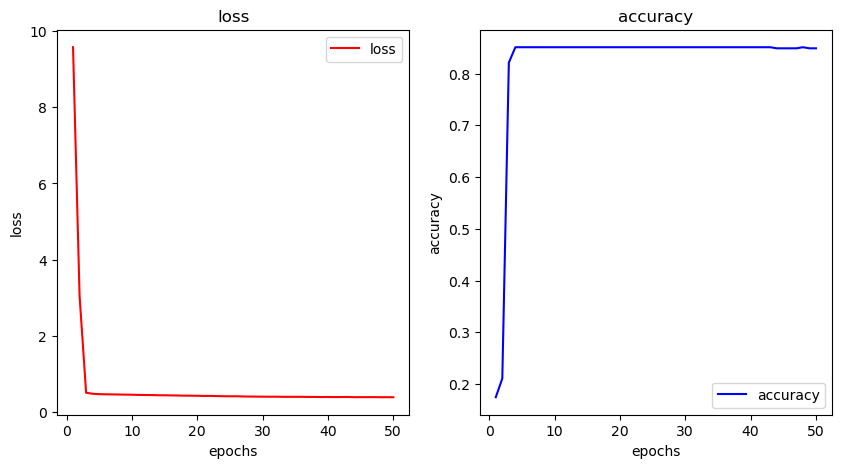

In [30]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'red', label = 'loss')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'accuracy')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

### 7. 예측

In [31]:
X[0:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60


In [32]:
y[0:1]

0    0
Name: 16, dtype: int64

In [33]:
model.predict([[0, 2.4, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 50]])

1/1 [==============================] - 0s 62ms/step


array([[0.34361702]], dtype=float32)